In [1]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('btc_usd_arb.csv')

In [3]:
df.head()

,timestamp,buy_exchange,sell_exchange,profit_usd,volume_usd,volume_btc
0,1.530534e+09,bitfinex,livecoin,235.963228,10020.0,1.579198
1,1.530534e+09,bitstamp,livecoin,230.293142,10025.0,1.579095
2,1.530534e+09,cex,livecoin,202.384398,10025.0,1.574797
3,1.530534e+09,exmo,livecoin,211.997161,10020.0,1.575508
4,1.530534e+09,gdax,livecoin,238.540883,10030.0,1.581135


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [5]:
df.head()

,timestamp,buy_exchange,sell_exchange,profit_usd,volume_usd,volume_btc
0,2018-07-02 12:13:36.821283,bitfinex,livecoin,235.963228,10020.0,1.579198
1,2018-07-02 12:13:36.821283,bitstamp,livecoin,230.293142,10025.0,1.579095
2,2018-07-02 12:13:36.821283,cex,livecoin,202.384398,10025.0,1.574797
3,2018-07-02 12:13:36.821283,exmo,livecoin,211.997161,10020.0,1.575508
4,2018-07-02 12:13:36.821283,gdax,livecoin,238.540883,10030.0,1.581135


In [49]:
exchs = ['bitfinex', 'bitstamp', 'cex', 'exmo', 'gdax', 'kraken', 'livecoin']
n_exch = len(exchs)

In [50]:
buy_exch_cnt = {exch: 0 for exch in exchs}
sell_exch_cnt = {exch: 0 for exch in exchs}
pair_exch_cnt = {exch1: {exch2: 0 for exch2 in exchs} for exch1 in exchs}

for ix in df.index:
    buy_exch = df.loc[ix, 'buy_exchange']
    sell_exch = df.loc[ix, 'sell_exchange']
    buy_exch_cnt[buy_exch] += 1
    sell_exch_cnt[sell_exch] += 1  
    pair_exch_cnt[buy_exch][sell_exch] += 1

In [51]:
buy_exch_cnt

{'bitfinex': 2025,
 'bitstamp': 2079,
 'cex': 2034,
 'exmo': 7434,
 'gdax': 2051,
 'kraken': 2045,
 'livecoin': 0}

In [52]:
sell_exch_cnt

{'bitfinex': 1791,
 'bitstamp': 630,
 'cex': 1303,
 'exmo': 0,
 'gdax': 805,
 'kraken': 1043,
 'livecoin': 12096}

In [53]:
pairs_df = pd.DataFrame.from_dict(pair_exch_cnt, orient='index')
pairs_df

,bitfinex,bitstamp,cex,exmo,gdax,kraken,livecoin
bitfinex,0,0,26,0,0,0,1999
bitstamp,2,0,59,0,0,0,2018
cex,7,2,0,0,3,2,2020
exmo,1782,628,1150,0,802,1041,2031
gdax,0,0,39,0,0,0,2012
kraken,0,0,29,0,0,0,2016
livecoin,0,0,0,0,0,0,0


In [54]:
data_dict = dict()
for exch1 in exchs:
    for exch2 in exchs:
        data_dict[(exch1, exch2)] = {'profit_usd': [], 'volume_usd': [], 'volume_btc': []}
for ix in df.index:
    buy_exch = df.loc[ix, 'buy_exchange']
    sell_exch = df.loc[ix, 'sell_exchange']
    data_dict[(buy_exch, sell_exch)]['profit_usd'].append(df.loc[ix, 'profit_usd'])
    data_dict[(buy_exch, sell_exch)]['volume_usd'].append(df.loc[ix, 'volume_usd'])
    data_dict[(buy_exch, sell_exch)]['volume_btc'].append(df.loc[ix, 'volume_btc'])

In [55]:
def plot_my_data(col):
    for pair in data_dict:
        exch1 = pair[0]
        exch2 = pair[1]
        if exch1 != exch2 and pairs_df.loc[exch1, exch2] > 0:
            plt.hist(data_dict[(exch1, exch2)][col], bins=25)
            plt.title(exch1 + '_' + exch2 + ' ({})'.format(pairs_df.loc[exch1, exch2]))
            plt.show()


def plot_my_data_square(col):
    fig, ax = plt.subplots(n_exch, n_exch, figsize=(50,50))
    fig.suptitle('Profit (USD)')
    for i in range(n_exch):
        exch1 = exchs[i]
        for j in range(n_exch):
            exch2 = exchs[j]
            if exch1 != exch2 and pairs_df.loc[exch1, exch2] > 0:
                ax[i,j].hist(data_dict[(exch1, exch2)][col], bins=25)
                ax[i,j].set_title(exch1 + '_' + exch2 + ' ({})'.format(pairs_df.loc[exch1, exch2]))
                ax[i,j].axis('off')
    fig.subplots_adjust(hspace=0.3)
    #plt.tight_layout()
    plt.show()    

********************  profit_usd  ********************


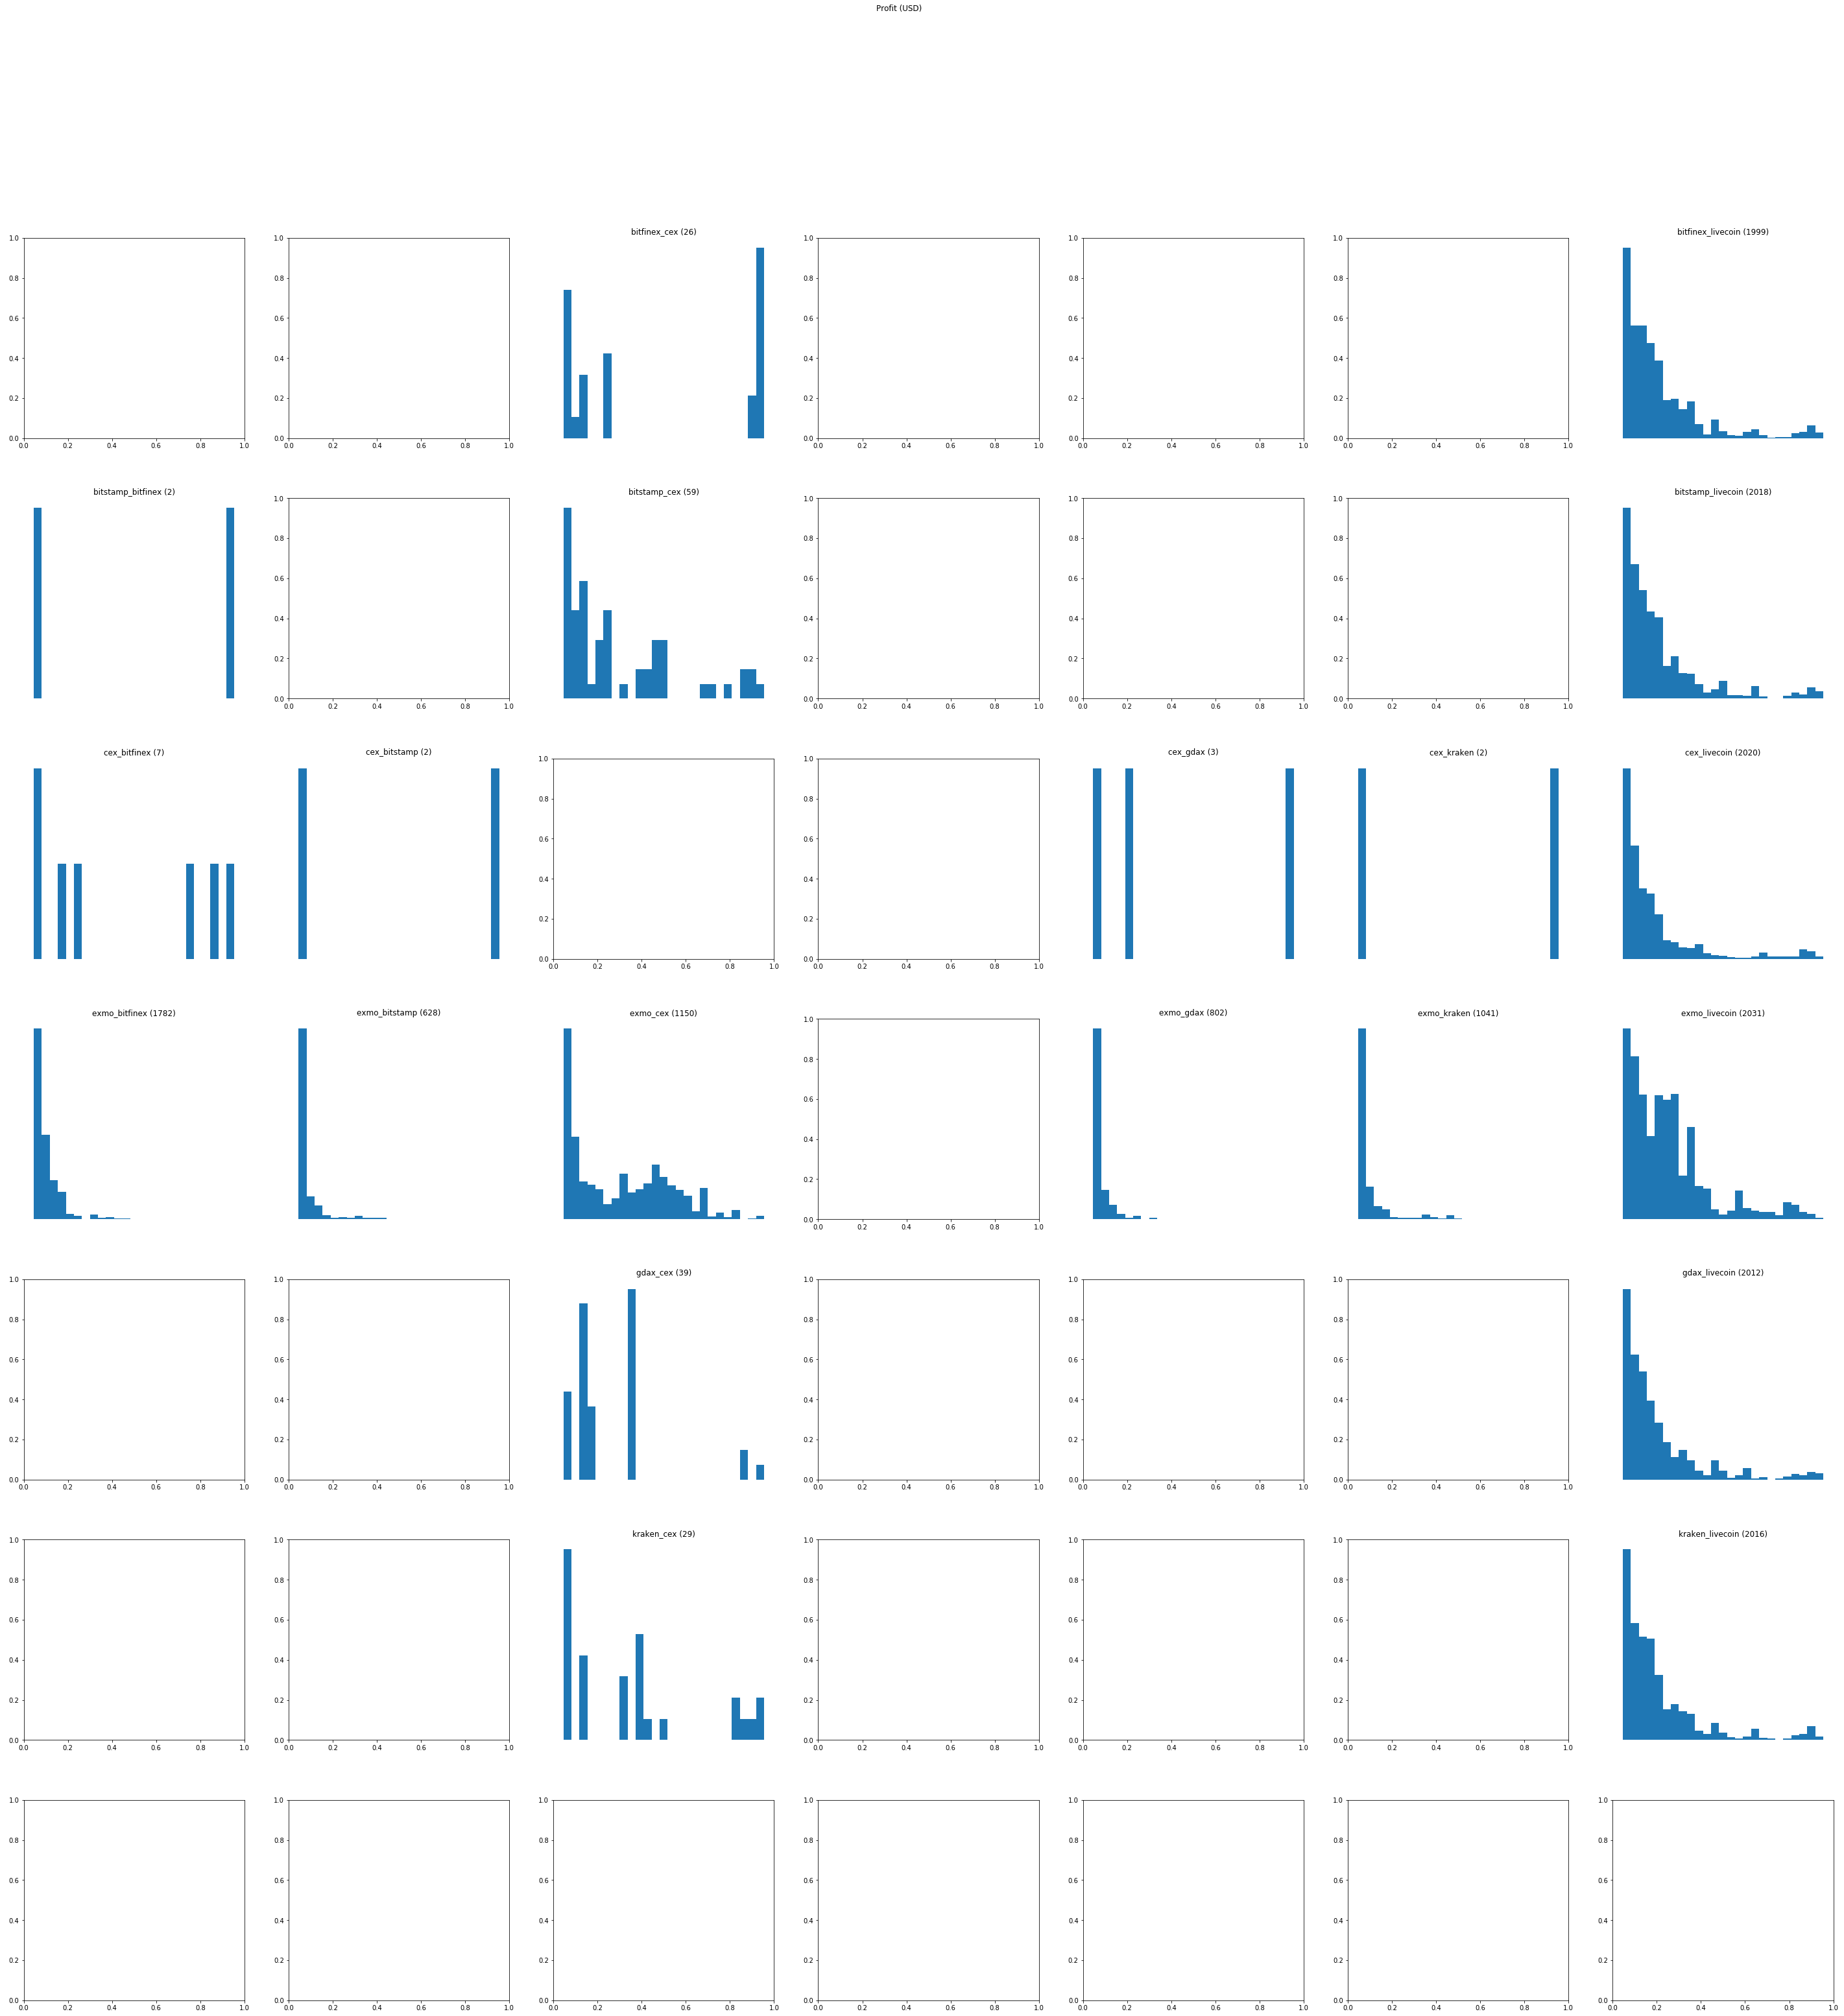

In [56]:
print(20*'*', ' profit_usd ', 20*'*')
plot_my_data_square('profit_usd')